---
#### Shane Fitzpatrick
---
# Investor Forecasting Simulation 

### Packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Defining the Investor Class

In [2]:
class Investor:
    def __init__(self, investor_type, alpha=0.75, beta=1.0):
        """
        investor_type: forecast method ('naive', 'adaptive', 'trend')
        alpha: parameter for adaptive forecasts
        beta: parameter for trend forecasts
        """
        self.type = investor_type
        self.alpha = alpha
        self.beta = beta
        self.past_forecasts = []  # create list to store forecasts

    def initialize_forecast(self):
        """Provide an initial guess for period 1."""
        initial_guess = random.uniform(0, 100)
        self.past_forecasts.append(initial_guess)  # guessing for 1st period

    def predict(self, prices_history):
        """
        Return the investor's forecast for p_{t+1} given the actual price history.
        - prices_history[-1] is p_{t-1}.
        """
        if len(prices_history) == 0:
            # no history, then we return last stored forecast 
            return self.past_forecasts[-1]

        if self.type == "adaptive":
            # p_{t+1}^e = alpha * p_{t-1} + (1 - alpha)* last forecast + noise
            p_t_minus_1 = prices_history[-1]
            old_forecast = self.past_forecasts[-1]
            noise = np.random.normal(0, 1)
            new_forecast = self.alpha * p_t_minus_1 + (1 - self.alpha) * old_forecast + noise
        elif self.type == "trend":
            # p_{t+1}^e = p_{t-1} + beta*(p_{t-1} - p_{t-2}) + noise
            if len(prices_history) < 2:
                new_forecast = prices_history[-1]
            else:
                p_t_minus_1 = prices_history[-1]
                p_t_minus_2 = prices_history[-2]
                noise = np.random.normal(0, 1)
                new_forecast = p_t_minus_1 + self.beta * (p_t_minus_1 - p_t_minus_2) + noise
        elif self.type == "naive":
            # p_{t+1}^e = p_{t-1}
            new_forecast = prices_history[-1]
        else:
            # fallback forecast that we default to 
            new_forecast = random.uniform(0, 100)

        self.past_forecasts.append(new_forecast)
        return new_forecast

### Defining the Market Class

In [3]:
class Market:
    def __init__(self, investors, interest_rate=0.05, dividend=3.0, num_periods=50):  # .05 int rate, 50 periods
        """
        investors: list of Investor objects.
        interest_rate: i in p_t = (E[p_{t+1}] + d)/(1+i) + shock.
        dividend: constant dividend d.
        num_periods: number of periods to simulate.   
        """
        # intertemporal asset pricing 
        self.investors = investors
        self.i = interest_rate
        self.d = dividend
        self.num_periods = num_periods
        self.prices_history = []  # empty list that stores market prices
        
    def initialize_investors(self):
        """Ensure each investor has an initial forecast."""
        for inv in self.investors:
            inv.initialize_forecast()
    
    def simulate(self):
        """Simulate the market for the specified number of periods."""
        self.initialize_investors()
        for t in range(self.num_periods):
            forecasts = []
            # each investor makes a forecast based on current price history
            for inv in self.investors:
                f = inv.predict(self.prices_history)
                forecasts.append(f)
            # average forecasts to form market expectation
            avg_forecast = sum(forecasts) / len(forecasts)
            # compute price with a shock; random factor
            shock = np.random.normal(0, 1)
            p_t = (avg_forecast + self.d) / (1 + self.i) + shock
            self.prices_history.append(p_t)
    
    def plot_results(self):
        """Plot the simulated market prices over time."""
        plt.figure(figsize=(8, 5))
        plt.plot(self.prices_history, label="Market Price")
        plt.title("Simulated Market Prices Over Time")
        plt.xlabel("Period")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

### Running the simulation, producing visual

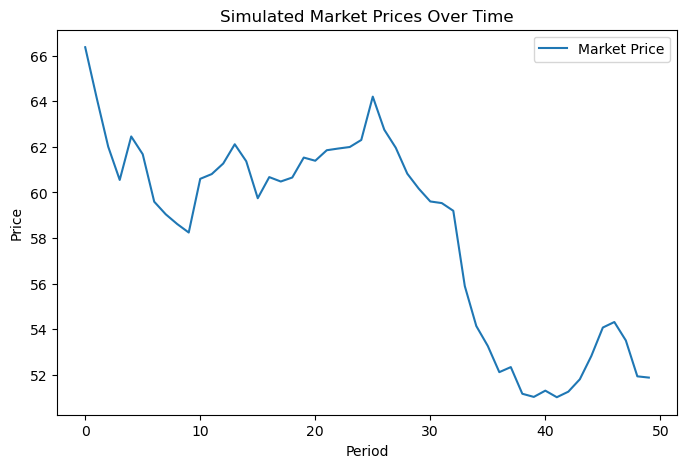

Final Market Price = 51.87839193248798
Investor 0 (Type: adaptive), Final Forecast = 50.33780105072761
Investor 1 (Type: trend), Final Forecast = 51.613845210486666
Investor 2 (Type: trend), Final Forecast = 49.03143043445851
Investor 3 (Type: naive), Final Forecast = 51.933244217988914
Investor 4 (Type: adaptive), Final Forecast = 52.42140933002914
Investor 5 (Type: trend), Final Forecast = 49.285742670511794


In [4]:
def main():
    np.random.seed(123)  # for ease of reproducibility
    # make a list of investors with a mix of forecast types
    investor_types = ["adaptive", "trend", "trend", "naive", "adaptive", "trend"]
    investors = [Investor(investor_type=ttype, alpha=0.75, beta=1.0) for ttype in investor_types]
    
    # integrating investors to market sim 
    market = Market(investors=investors, interest_rate=0.05, dividend=3.0, num_periods=50)
    
    # run the simulation
    market.simulate()
    
    # plot resulting market prices
    market.plot_results()
    
    # print final market price and each investor's final forecast
    print("Final Market Price =", market.prices_history[-1])
    for i, inv in enumerate(market.investors):
        print(f"Investor {i} (Type: {inv.type}), Final Forecast = {inv.past_forecasts[-1]}")  # takes most recent forecast 

if __name__ == "__main__":
    main()
